In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

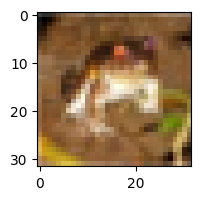

In [7]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])

In [8]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [8]:
# y_train = y_train.reshape(1,-1)

In [9]:
y_train.shape

(50000, 1)

In [10]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print(len(classes))

10


In [11]:
def plot_sample(X,y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])

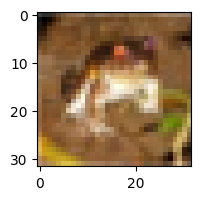

In [12]:
plot_sample(X_train,y_train,0)

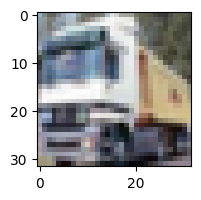

In [13]:
plot_sample(X_train,y_train,1)

In [14]:
X_train = X_train/255.0

X_test = X_test /255.0

In [15]:
# #lets create one hot encoding for our classes/label/output
# #there is an api in keras 
# print(y_train[:5])
# y_train_scaled=tf.keras.utils.to_categorical(y_train,num_classes=10)
# print('converting useing one hot encoding')
# y_train_scaled[:5]
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

print(X_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [17]:
model = Sequential()

model.add(Flatten(input_shape=(32,32,3)))

model.add(Dense(3000,activation='relu'))

model.add(Dense(1000,activation='relu'))

model.add(Dense(10,activation='sigmoid'))

model.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train,y_train,batch_size=32,epochs=5)

KeyboardInterrupt: 

In [43]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4772 - loss: 1.4714


[1.47507905960083, 0.47450000047683716]

In [21]:
from sklearn.metrics import classification_report,accuracy_score

In [46]:
pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [53]:
y_pred_classes = [np.argmax(element) for element in pred]

In [54]:
print(classification_report(y_pred_classes,y_test))

              precision    recall  f1-score   support

           0       0.94      0.17      0.28      5681
           1       0.27      0.23      0.25      1155
           2       0.38      0.13      0.19      3006
           3       0.03      0.19      0.05       153
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      1.00      0.00         1
           9       0.00      0.00      0.00         0

    accuracy                           0.16     10000
   macro avg       0.16      0.17      0.08     10000
weighted avg       0.68      0.16      0.25     10000



C:\Users\shivd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shivd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shivd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
print(np.argmax(pred[0]))
classes[y_test[0][0]]

1


'cat'

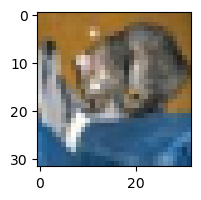

In [57]:
plt.figure(figsize=(15,2))
plt.imshow(X_test[0])

# Cnn model

In [22]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import models

In [24]:
    cnn_model = models.Sequential([
    
    Conv2D(32,3,padding='same',activation='relu',input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(32,3,activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(20,activation='relu'),
    Dense(10,activation='softmax')
    ])



cnn_model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

cnn_model.fit(X_train,y_train,batch_size=32,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 44s 27ms/step - loss: 1.5603 - accuracy: 0.4309
Epoch 2/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.2394 - accuracy: 0.5523
Epoch 3/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.1127 - accuracy: 0.6016
Epoch 4/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.0275 - accuracy: 0.6336
Epoch 5/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9667 - accuracy: 0.6582
Epoch 6/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9230 - accuracy: 0.6770
Epoch 7/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8869 - accuracy: 0.6866
Epoch 8/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8580 - accuracy: 0.6961
Epoch 9/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8350 - accuracy: 0.7050
Epoch 10/10
1563/1563 [==============================] - 38s 25m

In [25]:
cnn_model.evaluate(X_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9212 - accuracy: 0.6850


[0.9212027192115784, 0.6850000023841858]

In [26]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1568)              0         
                                                                 
 dense_5 (Dense)             (None, 20)               

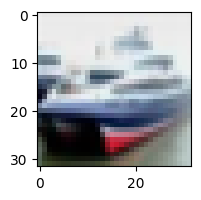

In [27]:
plot_sample(X_test,y_test,1)

In [28]:
y_pred = cnn_model.predict(X_test)

313/313 [==============================] - 3s 11ms/step


In [29]:
y_pred_classes = [np.argmax(element) for element in y_pred]

In [30]:
y_pred_classes[0:5]

[3, 8, 8, 0, 6]

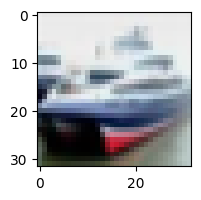

In [31]:
plot_sample(X_test,y_test,1)

In [32]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [33]:
classes[y_pred_classes[1]]

'ship'

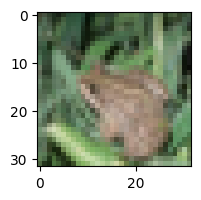

In [34]:
plot_sample(X_test,y_test,4)

In [35]:
classes[y_pred_classes[4]]

'frog'

In [36]:
print(classification_report(y_pred_classes,y_test))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72      1163
           1       0.80      0.79      0.80      1010
           2       0.55      0.60      0.57       908
           3       0.32      0.57      0.41       560
           4       0.68      0.59      0.63      1149
           5       0.60      0.58      0.59      1033
           6       0.81      0.72      0.76      1124
           7       0.75      0.73      0.74      1036
           8       0.78      0.78      0.78       993
           9       0.77      0.76      0.76      1024

    accuracy                           0.69     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.71      0.69      0.69     10000



In [37]:
cnn_model.save("cnn.h5")

In [38]:
new_model = tf.keras.models.load_model("cnn.h5")

In [39]:
y_pred = new_model.predict(X_test)

313/313 [==============================] - 3s 10ms/step


In [40]:
y_pred_class = [np.argmax(word) for word in y_pred]

In [41]:
y_pred_class

[3,
 8,
 8,
 0,
 6,
 6,
 1,
 6,
 3,
 1,
 0,
 9,
 5,
 7,
 9,
 8,
 5,
 7,
 8,
 6,
 7,
 0,
 2,
 9,
 4,
 2,
 4,
 0,
 9,
 6,
 6,
 4,
 4,
 3,
 9,
 9,
 4,
 9,
 9,
 5,
 0,
 6,
 5,
 6,
 0,
 9,
 5,
 9,
 7,
 2,
 9,
 0,
 5,
 3,
 8,
 8,
 7,
 4,
 6,
 6,
 7,
 5,
 6,
 0,
 6,
 2,
 1,
 2,
 3,
 9,
 0,
 6,
 8,
 8,
 0,
 2,
 9,
 3,
 5,
 8,
 8,
 1,
 1,
 7,
 2,
 7,
 2,
 0,
 9,
 9,
 0,
 5,
 8,
 6,
 4,
 6,
 6,
 0,
 0,
 0,
 4,
 7,
 6,
 6,
 1,
 1,
 2,
 6,
 8,
 7,
 4,
 0,
 2,
 2,
 1,
 3,
 0,
 4,
 6,
 5,
 8,
 2,
 1,
 2,
 8,
 8,
 8,
 5,
 3,
 0,
 4,
 1,
 8,
 9,
 1,
 2,
 9,
 7,
 2,
 8,
 6,
 5,
 6,
 5,
 8,
 4,
 6,
 6,
 5,
 5,
 1,
 1,
 6,
 9,
 0,
 5,
 2,
 9,
 3,
 4,
 2,
 1,
 6,
 6,
 0,
 7,
 8,
 6,
 9,
 0,
 9,
 9,
 9,
 8,
 9,
 9,
 3,
 7,
 3,
 0,
 0,
 7,
 2,
 2,
 6,
 8,
 6,
 3,
 6,
 8,
 5,
 3,
 0,
 1,
 7,
 2,
 8,
 8,
 7,
 8,
 3,
 1,
 8,
 7,
 1,
 3,
 0,
 5,
 7,
 9,
 5,
 0,
 5,
 9,
 2,
 0,
 4,
 9,
 0,
 4,
 7,
 4,
 9,
 4,
 3,
 9,
 7,
 2,
 3,
 2,
 5,
 1,
 5,
 1,
 8,
 0,
 4,
 0,
 3,
 5,
 1,
 9,
 8,
 9,
 0,
 2,
 0,
 8,
 2,
 0,


In [42]:
classes[y_pred_class[4]]

'frog'

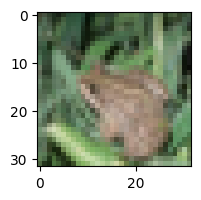

In [43]:
plot_sample(X_test,y_test,4)

In [44]:
import pickle

In [45]:
pickle.dump(cnn_model,open("model.pkl",'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2024-06-05 08:59:30         3095
metadata.json                                  2024-06-05 08:59:30           64
variables.h5            